<a href="https://colab.research.google.com/github/harsheev/CBC_NewsArticles/blob/master/Creating_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This notebook goes over creating LDA models with different number of topics and chossinf the best model based on C_v coherence**

In [ ]:
#@title Set up Directory { run: "auto"}
import os
from IPython.display import clear_output
from google.colab import drive 
from IPython.display import clear_output
drive.mount('/content/gdrive')
working_directory = 'My Drive/LDA_CBC_NewsArticles' #@param {type:"string"}
wd="/content/gdrive/"+working_directory
os.chdir(wd)

dirpath = os.getcwd()
print("current directory is : " + dirpath)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
current directory is : /content/gdrive/My Drive/LDA_CBC_NewsArticles


In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import pickle

from gensim.models.coherencemodel import CoherenceModel

import matplotlib.pyplot as plt

dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
text = pickle.load(open('text_data.pkl', 'rb'))

In [ ]:
#creating different models with random number of topics (no pattern)
topic_sizes=[3,5,10,15,25,30]
for i in topic_sizes:
  num_topics= i
  ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = num_topics, id2word=dictionary, passes=15)
  ldamodel.save(f'model{i}.gensim')


In [ ]:
lda3= gensim.models.ldamodel.LdaModel.load('model3.gensim')
lda5= gensim.models.ldamodel.LdaModel.load('model5.gensim')
lda10= gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda15= gensim.models.ldamodel.LdaModel.load('model15.gensim')
lda25= gensim.models.ldamodel.LdaModel.load('model25.gensim')
lda30= gensim.models.ldamodel.LdaModel.load('model30.gensim')

In [ ]:
#calculating c_v coherence score for each model
coherence_score= []
cm_model= [lda3,lda5,lda10,lda15,lda25,lda30]
for i in range(len(cm_model)):
  cm= CoherenceModel(model=cm_model[i],texts=text,corpus=corpus,dictionary=dictionary,coherence='c_v',topn=15)
  cv= cm.get_coherence()
  coherence_score.append(cv)

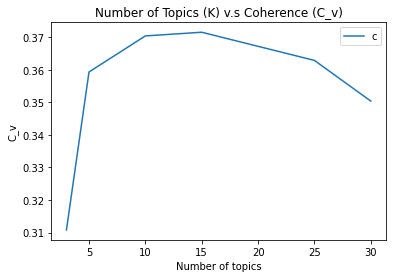

In [ ]:
#plotting K vs C_v 

plt.plot([3,5,10,15,25,30],coherence_score)
plt.title('Number of Topics (K) v.s Coherence (C_v)')
plt.xlabel('Number of topics')
plt.ylabel('C_v')
plt.legend(('c_v'), loc='best')